In [3]:
import gym
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
from maze import Maze

In [7]:
# Loading environment
env = Maze()

In [8]:
initial_state = env.reset()
print(f'The new episode will start at new state : {initial_state}')

The new episode will start at new state : (0, 0)


In [11]:
# This method generates an image that represents the current state of the environment,

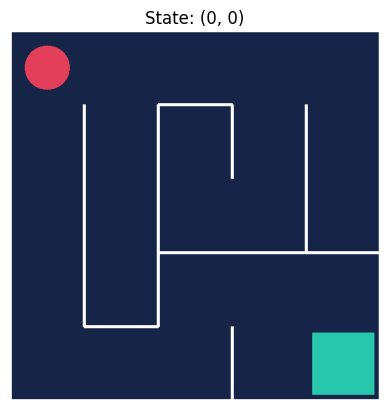

In [10]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"State: {initial_state}")
plt.imshow(frame)

In [12]:
action = 2 # taking 2nd action
next_state,reward,done,info = env.step(action)

print(f"After moving down 1 row, the agent is in state: {next_state}")
print(f"After moving down 1 row, we got a reward of: {reward}")
print("After moving down 1 row, the task is", "" if done else "not", "finished")

After moving down 1 row, the agent is in state: (1, 0)
After moving down 1 row, we got a reward of: -1.0
After moving down 1 row, the task is not finished


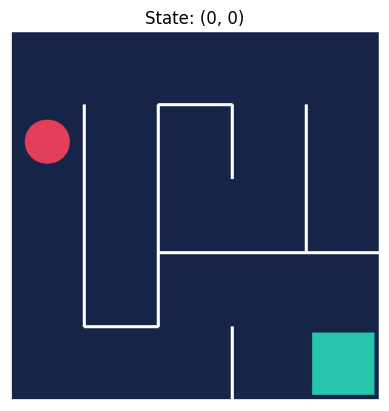

In [16]:
# After taking first action the agent in state
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"State: {initial_state}")
plt.imshow(frame)
env.close()

1. The state space tells us what kind of observations the environment provides.
2. MultiDiscrete([5 5]) means:
2. The observation space is a grid with 5 rows and 5 columns.
2. Each dimension (row and column) has 5 possible values: {0, 1, 2, 3, 4}.
2. The agent's position is represented as (row, column), meaning the agent’s state is defined by two discrete values.

In [17]:
env = Maze()
print(f"For example, the initial state is: {env.reset()}")
print(f"The space state is of type: {env.observation_space}")

For example, the initial state is: (0, 0)
The space state is of type: MultiDiscrete([5 5])


In [18]:
print(f"An example of a valid action is: {env.action_space.sample()}")
print(f"The action state is of type: {env.action_space}")

An example of a valid action is: 1
The action state is of type: Discrete(4)


Creating trajectory
t =  So,Ao,R1..........

In [20]:
env = Maze()
state = env.reset()
trajectory = []
for _ in  range(3):
    action = env.action_space.sample()
    next_state,reward,done,info = env.step(action)
    trajectory.append([state,action,reward,done,next_state])
    state = next_state
env.close()
print(f"Congurlation You generte the first trajectory: \n{trajectory}")

Congurlation You generte the first trajectory: 
[[(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 3, -1.0, False, (0, 0)]]


Congrats! You just generated your first episode:
[[(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 1, -1.0, False, (0, 2)], [(0, 2), 2, -1.0, False, (0, 2)], [(0, 2), 3, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 2, -1.0, False, (2, 1)], [(2, 1), 3, -1.0, False, (2, 1)], [(2, 1), 0, -1.0, False, (1, 1)], [(1, 1), 0, -1.0, False, (0, 1)], [(0, 1), 1, -1.0, False, (0, 2)], [(0, 2), 2, -1.0, False, (0, 2)], [(0, 2), 0, -1.0, False, (0, 2)], [(0, 2), 3, -1.0, False, (0, 1)], [(0, 1), 1, -1.0, False, (0, 2)], [(0, 2), 1, -1.0, False, (0, 3)], [(0, 3), 2, -1.0, False, (1, 3)], [(1, 3), 3, -1.0, False, (1, 3)], [(1, 3), 1, -1.0, False, (1, 3)], [(1, 3), 3, -1.0, False, (1, 3)], [(1, 3), 2, -1.0, False, (2, 3)], [(2, 3), 0, -1.0, False, (1, 3)], [(1, 3), 1, -1.0, False, (1, 3)], [(1, 3), 0, -1.0, False, (0, 3)], [(0, 3), 0, -1.0, False, (0, 3)], [(0, 3), 0, -1.0, False, (0, 3)]

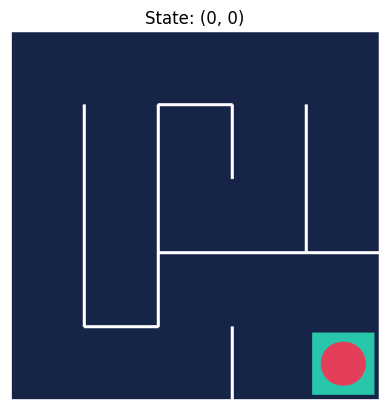

In [25]:
env = Maze()
state = env.reset()
episode = []
done = False
while not done:
    action = env.action_space.sample()
    next_state, reward, done, extra_info = env.step(action)
    episode.append([state, action, reward, done, next_state])
    state = next_state
    frame = env.render(mode='rgb_array')
    plt.axis('off')
    plt.title(f"State: {initial_state}")
    plt.imshow(frame)
    
env.close()
print(f"Congrats! You just generated your first episode:\n{episode}")

##### Rewards and returns

A reward is numerical feedback that the environment generates when the agent takes an action *a* in a state *s*:

\begin{equation}
    r = r(s, a)
\end{equation}

Let's generate a reward from the environment:

In [26]:
env = Maze()
state = env.reset()
action = env.action_space.sample()
_, reward, _, _ = env.step(action)
print(f"We achieved a reward of {reward} by taking action {action} in state {state}")

We achieved a reward of -1.0 by taking action 3 in state (0, 0)


In [27]:
env = Maze()
state = env.reset()
done = False
gamma = 0.99
G_0 = 0
t = 0
while not done:
    action = env.action_space.sample()
    _, reward, done, _ = env.step(action)
    G_0 += gamma ** t * reward
    t += 1
env.close()

print(
    f"""It took us {t} moves to find the exit,
    and each reward r(s,a)=-1, so the return amounts to {G_0}""")

It took us 150 moves to find the exit,
    and each reward r(s,a)=-1, so the return amounts to -77.85482127611381


In [28]:
def random_policy(state):
    return np.array([0.25] * 4)

In [29]:
env = Maze()
state = env.reset()

In [30]:
action_probabilities = random_policy(state)

In [31]:
action_probabilities

array([0.25, 0.25, 0.25, 0.25])

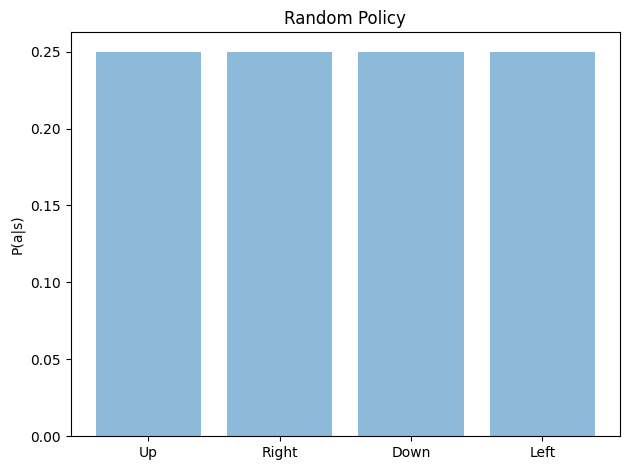

In [34]:
objects = ('Up', 'Right', 'Down', 'Left')
y_pos = np.arange(len(objects))

plt.bar(y_pos, action_probabilities, alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('P(a|s)')
plt.title('Random Policy')
plt.tight_layout()

plt.show()

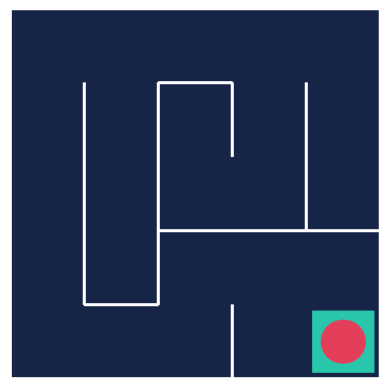

In [39]:
env.reset()
done = False
img = plt.imshow(env.render(mode='rgb_array'))
while not done:
    action = np.random.choice(range(4),1,p=action_probabilities)
    _,_,done,_ = env.step(action)
    img.set_data(env.render(mode='rgb_array'))
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
env.close()

In [44]:
action = np.random.choice(range(4),1,p=action_probabilities)
action

array([0])